In [1]:
import numpy as np

from numericke_metody.derint import (forward_difference, backward_difference,
                                              central_difference, sym_diff,
                                             second_central_difference, sym_diff2, der_richardson)
from numericke_metody.derint import (rectangle_integrate, trapezoid_integrate, 
                                     simpson_integrate, sym_integrate)
from numericke_metody.utils.visualizations import multiplot_vals

# Levá, pravá, centrální diference

In [2]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
fce = 'log(x)'

x0 = 3
h = .8

f_diff_sym = sym_diff(fce,x0)
f_diff_fd = forward_difference(fce,x0,h)
f_diff_bd = backward_difference(fce,x0,h)
f_diff_cd = central_difference(fce,x0,h)

print(f'Skutečná hodnota f\'(x):  {f_diff_sym:15.8f}')
print(f'Pravá diference:         {f_diff_fd:15.8f} (chyba: {np.abs(f_diff_fd - f_diff_sym):10.8f})')
print(f'Levá diference:          {f_diff_bd:15.8f} (chyba: {np.abs(f_diff_bd - f_diff_sym):10.8f})')
print(f'Centrální diference:     {f_diff_cd:15.8f} (chyba: {np.abs(f_diff_cd - f_diff_sym):10.8f})')

Skutečná hodnota f'(x):       0.33333333
Pravá diference:              0.29548597 (chyba: 0.03784736)
Levá diference:               0.38769366 (chyba: 0.05436033)
Centrální diference:          0.34158982 (chyba: 0.00825648)


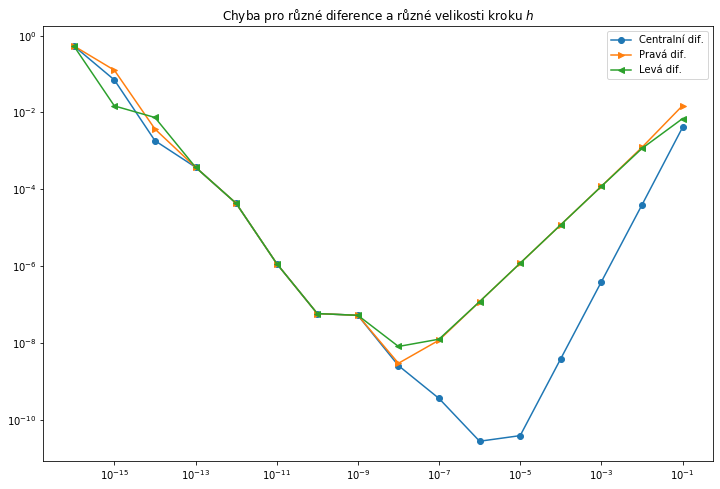

In [3]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(1/x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

# pro jaké velikosti kroku budu derivovat
x0 = 1
hs = [1e-16,1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-09,
     1e-08,1e-07,1e-06,1e-05,0.0001,0.001,0.01,0.1]

f_diff_sym = sym_diff(fce,x0)

err_forward = [np.abs(forward_difference(fce,x0,h) - f_diff_sym) for h in hs]
err_backward = [np.abs(backward_difference(fce,x0,h) - f_diff_sym) for h in hs]
err_central = [np.abs(central_difference(fce,x0,h) - f_diff_sym) for h in hs]

vals = []

vals.append({'ys': err_central, 'line': 'o-', 'label': 'Centralní dif.'})
vals.append({'ys': err_forward, 'line': '>-', 'label': 'Pravá dif.'})
vals.append({'ys': err_backward, 'line': '<-', 'label': 'Levá dif.'})

multiplot_vals(hs,
               vals,
               'Chyba pro různé diference a různé velikosti kroku $h$',
               xscale='log',
               yscale='log')

# Druhá centrální diference

In [4]:
# fce kterou chci derivovat, musí být v proměnné x
fce = 'sin(x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

x0 = 1.5
h = .5

f_diff2_sym = sym_diff2(fce,x0)
f_diff2_cd = second_central_difference(fce,x0,h)

print(f'Skutečná hodnota f\'\'(x):   {f_diff2_sym:15.8f}')
print(f'Druhá centrální diference: {f_diff2_cd:15.8f} (chyba: {np.abs(f_diff2_cd - f_diff2_sym):10.8f})')


Skutečná hodnota f''(x):       -0.99749499
Druhá centrální diference:     -0.97688625 (chyba: 0.02060874)


# Richardsonova extrapolace

In [9]:
# fce kterou chci derivovat, musí být v proměnné x
#fce = 'sin(x)' 
#fce = 'exp(x)' 
#fce = 'exp(1/x)'
fce = 'log(x)'

x0 = 3
h = 0.8
N = 3

f_diff_sym = sym_diff(fce,x0)
f_diff_rich = der_richardson(fce, x0, h, N, method='cd')['f_der']

print(f'Skutečná hodnota f\'(x):                {f_diff_sym:15.8f}')
print(f'Derivace s Richardsonovou extrapolací: {f_diff_rich:15.8f} (chyba: {np.abs(f_diff_rich - f_diff_sym):10.8f})')



Skutečná hodnota f'(x):                     0.33333333
Derivace s Richardsonovou extrapolací:      0.33333333 (chyba: 0.00000000)


# Určitý integrál

In [5]:
# fce kterou chci integrovat, musí být v proměnné x
#fce = 'sin(x)' 
fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

a = 1
b = 1.2
N = 2

i_sym = sym_integrate(fce, a, b)
i_rectangle = rectangle_integrate(fce, a, b, N)
i_trapezoid = trapezoid_integrate(fce, a, b, N)
i_simpson = simpson_integrate(fce, a, b, N)

print(f'Skutečná hodnota integrálu:  {i_sym:15.8f}')
print(f'Obdélníkové pravidlo:        {i_rectangle:15.8f} (chyba: {i_rectangle - i_sym:11.8f})')
print(f'Lichoběžníkové pravidlo:     {i_trapezoid:15.8f} (chyba: {i_trapezoid - i_sym:11.8f})')
print(f'Simpsonovo pravidlo:         {i_simpson:15.8f} (chyba: {i_simpson - i_sym:11.8f})')

Skutečná hodnota integrálu:       0.60183509
Obdélníkové pravidlo:             0.60158440 (chyba: -0.00025069)
Lichoběžníkové pravidlo:          0.60233654 (chyba:  0.00050145)
Simpsonovo pravidlo:              0.60183543 (chyba:  0.00000033)


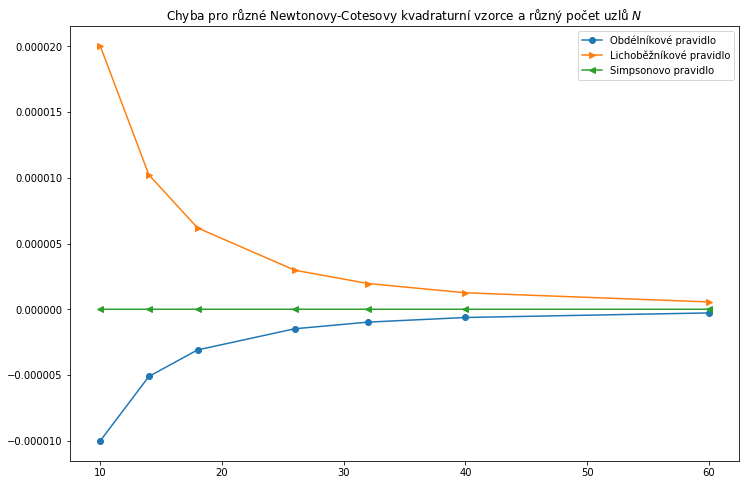

In [6]:
# fce kterou chci integrovat, musí být v proměnné x
#fce = 'sin(1/x)' 
fce = 'exp(x)' 
#fce = 'exp(1/x)'
#fce = 'log(x)'

a = 1
b = 1.2

Ns = [10,14,18,26,32,40,60]

i_sym = sym_integrate(fce, a, b)

err_rectangle = [rectangle_integrate(fce, a, b, N) - i_sym for N in Ns]
err_trapezoid = [trapezoid_integrate(fce, a, b, N) - i_sym for N in Ns]
err_simpson = [simpson_integrate(fce, a, b, N) - i_sym for N in Ns]

vals = []

vals.append({'ys': err_rectangle, 'line': 'o-', 'label': 'Obdélníkové pravidlo'})
vals.append({'ys': err_trapezoid, 'line': '>-', 'label': 'Lichoběžníkové pravidlo'})
vals.append({'ys': err_simpson, 'line': '<-', 'label': 'Simpsonovo pravidlo'})

multiplot_vals(Ns, vals,
               'Chyba pro různé Newtonovy-Cotesovy kvadraturní vzorce a různý počet uzlů $N$',
              )

__TODO:__ Dodělat kreslení integrálů